In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import seaborn as sns



In [2]:
df = pd.read_csv('walmart_clean.csv')

In [3]:
df.head()

,Unnamed: 0,index,Store_x,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Id,Weekly_Sales,Store_y,Type,Size
0,0,0,1,2010-02-05,42.31,2.572,211.096358,8.106,0,1_1_2012-11-02,0,1,A,151315
1,1,1,1,2010-02-12,38.51,2.548,211.242170,8.106,1,1_1_2012-11-09,0,2,A,202307
2,2,2,1,2010-02-19,39.93,2.514,211.289143,8.106,0,1_1_2012-11-16,0,3,B,37392
3,3,3,1,2010-02-26,46.63,2.561,211.319643,8.106,0,1_1_2012-11-23,0,4,A,205863
4,4,4,1,2010-03-05,46.50,2.625,211.350143,8.106,0,1_1_2012-11-30,0,5,B,34875


In [4]:
df_temp = df[['Date', 'Temperature']]
df_temp.columns = ['ds','y']
df_fuel = df[['Date', 'Fuel_Price']]
df_fuel.columns = ['ds','y']
df_cpi = df[['Date', 'CPI']]
df_cpi.columns = ['ds','y']

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
def log_trans(df,ts):
    return df[ts].apply(lambda x:np.log(x))

In [11]:
df_temp['ts_log']=log_trans(df_temp,'y')
df_fuel['ts_log']=log_trans(df_fuel,'y')
df_cpi['ts_log']=log_trans(df_cpi,'y')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [12]:
decomposition_temp = seasonal_decompose(df_temp['ts_log'],period=7,extrapolate_trend=4)
decomposition_fuel = seasonal_decompose(df_fuel['ts_log'],period=7,extrapolate_trend=4)
decomposition_cpi = seasonal_decompose(df_cpi['ts_log'],period=7,extrapolate_trend=4)

In [13]:
Decom_temp = df_temp
Decom_temp.loc[:,"trend"]= decomposition_temp.trend
Decom_temp.loc[:,"seasonal"]= decomposition_temp.seasonal
Decom_temp.loc[:,"residuals"]= decomposition_temp.resid

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
Decom_fuel = df_fuel
Decom_fuel.loc[:,"trend"]= decomposition_fuel.trend
Decom_fuel.loc[:,"seasonal"]= decomposition_fuel.seasonal
Decom_fuel.loc[:,"residuals"]= decomposition_fuel.resid

In [15]:
Decom_cpi = df_cpi
Decom_cpi.loc[:,"trend"]= decomposition_cpi.trend
Decom_cpi.loc[:,"seasonal"]= decomposition_cpi.seasonal
Decom_cpi.loc[:,"residuals"]= decomposition_cpi.resid

In [20]:
def plot_decomposition(df, ts,trend,seasonal, residual):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df[ts], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(df[trend], label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(df[seasonal],label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(df[residual], label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

    #plt.subtitle('Signal Decomposition of %s' %(ts), x =0.5, y= 1.05, fontsize = 18)
    plt.show()

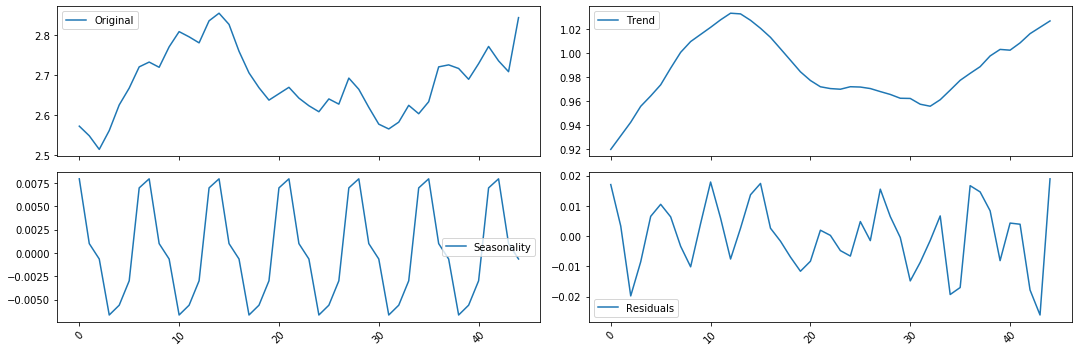

In [21]:
plot_decomposition(Decom_fuel,ts='ts_log',trend='trend',seasonal='seasonal',residual='residuals')

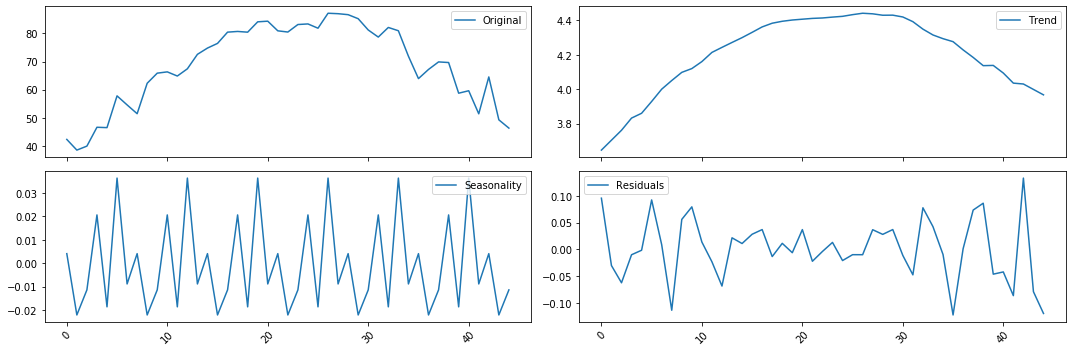

In [22]:
plot_decomposition(Decom_temp,ts='ts_log',trend='trend',seasonal='seasonal',residual='residuals')

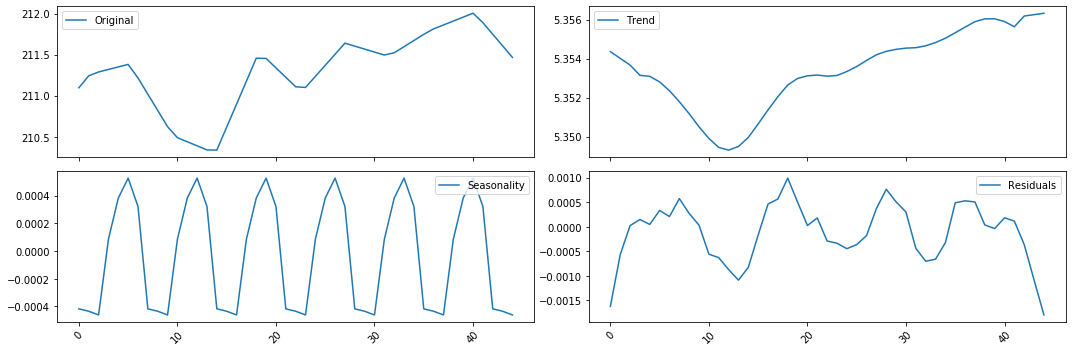

In [23]:
plot_decomposition(Decom_cpi,ts='ts_log',trend='trend',seasonal='seasonal',residual='residuals')

In [24]:
from statsmodels.tsa.stattools import adfuller

In [26]:
def test_stationarity(df, ts):

    rollmean = df[ts].rolling(window=12, center =False).mean()
    rolstd = df[ts].rolling(window=12, center = False).std()

    original = plt.plot(df[ts], color='blue', label ='original')
    mean = plt.plot(rollmean,
    color = 'red',
    label = 'Rolling Mean')
    std = plt.plot(rolstd,
    color = 'black',
    label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()

    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts],
    autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
    index = ['Test Statistic',
    'p-value',
    '# Lags Used',
    'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#test_stationarity(df, ts='ts')

In [ ]:
#test_stationarity(Decom_df, ts='residuals')

In [ ]:
#test_stationarity(Decom_df, ts='seasonal')

In [ ]:
#test_stationarity(Decom_df, ts='trend')

In [ ]:
#test_stationarity(Decom_df, ts='ts')

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
def run_arima(df,ts,p,d,q):
    model = ARIMA(df[ts], order=(p,d,q))
    results = model.fit(disp=1)

    len_results = len(results.fittedvalues)
    ts_modified = df[ts][-len_results:]

    rss = sum((results.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss/len(df[ts]))

    print("RMSE: ",rmse)
    plt.figure()
    plt.plot(df[ts])
    plt.plot(results.fittedvalues,color='red')
    plt.show()

    return results


RMSE:  0.007899169933450911


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


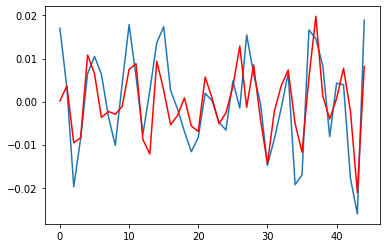

In [29]:
model_fuel = run_arima(Decom_fuel,ts="residuals", p=15,d=0,q=0   )

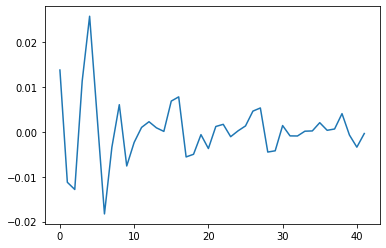

In [30]:
plt.figure()
plt.plot(model_fuel.forecast(42)[0])

In [32]:
model_fuel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              residuals   No. Observations:                   45
Model:                    ARMA(15, 0)   Log Likelihood                 153.866
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 11 Feb 2021   AIC                           -273.732
Time:                        14:29:21   BIC                           -243.019
Sample:                             0   HQIC                          -262.282
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0001      0.001      0.177      0.860      -0.001       0.002
ar.L1.residuals      0.4484      0.152      2.945      0.003       0.150       0.747
ar.L2.residuals     -0.5598      0.163     -3.443      0.001      -0.878      -0.241
ar.L3.residuals     -0.1222      0.203     -0.602      0.547      -0.520       0.276
ar.L4.residuals      0.3791      0.192      1.972      0.049       0.002       0.756
ar.L5.residuals     -0.2768      0.171     -1.615      0.106      -0.613       0.059
ar.L6.residuals      0.0279      0.194      0.144      0.886      -0.352       0.408
ar.L7.residuals     -0.2986      0.183     -1.632      0.103      -0.657       0.060
ar.L8.residuals      0.1146      0.187      0.612      0.541      -0.253       0.482
ar.L9.residuals     -0.2043      0.195     -1.047      0.295      -0.587       0.178
ar.L10.residuals    -0.1295      0.204     -0.635      0.526      -0.529       0.270
ar.L11.residuals     0.5660      0.186      3.051      0.002       0.202       0.930
ar.L12.residuals    -0.3040      0.203     -1.496      0.135      -0.702       0.094
ar.L13.residuals     0.1358      0.221      0.614      0.539      -0.298       0.569
ar.L14.residuals     0.0430      0.212      0.203      0.839      -0.373       0.459
ar.L15.residuals    -0.2509      0.188     -1.338      0.181      -0.619       0.117
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8777           -0.5670j            1.0449           -0.0913
AR.2             0.8777           +0.5670j            1.0449            0.0913
AR.3             1.1407           -0.2641j            1.1708           -0.0362
AR.4             1.1407           +0.2641j            1.1708            0.0362
AR.5             0.4384           -0.9548j            1.0506           -0.1815
AR.6             0.4384           +0.9548j            1.0506            0.1815
AR.7             0.1334           -1.0798j            1.0880           -0.2304
AR.8             0.1334           +1.0798j            1.0880            0.2304
AR.9            -0.0793           -1.0568j            1.0598           -0.2619
AR.10           -0.0793           +1.0568j            1.0598            0.2619
AR.11           -0.6516           -0.8009j            1.0325           -0.3587
AR.12           -0.6516           +0.8009j            1.0325            0.3587
AR.13           -1.0672           -0.2565j            1.0976           -0.4625
AR.14           -1.0672           +0.2565j            1.0976            0.4625
AR.15           -1.4125           -0.0000j            1.4125           -0.5000
------------------------------------------------------------------------------
"""

RMSE:  0.054409800607182854


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


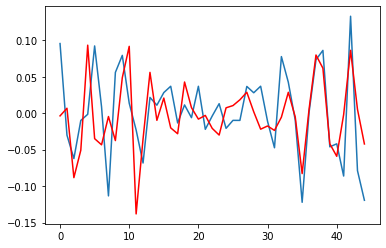

In [34]:
model_temp = run_arima(Decom_temp,ts="residuals", p=15,d=0,q=0   )

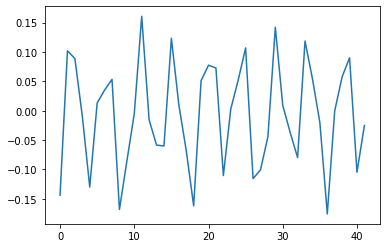

In [35]:
plt.figure()
plt.plot(model_temp.forecast(42)[0])

In [36]:
model_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              residuals   No. Observations:                   45
Model:                    ARMA(15, 0)   Log Likelihood                  53.110
Method:                       css-mle   S.D. of innovations              0.045
Date:                Thu, 11 Feb 2021   AIC                            -72.221
Time:                        14:32:15   BIC                            -41.508
Sample:                             0   HQIC                           -60.771
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0036   2.23e-07  -1.63e+04      0.000      -0.004      -0.004
ar.L1.residuals      0.0937   1.08e-06   8.71e+04      0.000       0.094       0.094
ar.L2.residuals     -0.0946   1.05e-06  -8.99e+04      0.000      -0.095      -0.095
ar.L3.residuals     -0.4903   6.96e-06  -7.04e+04      0.000      -0.490      -0.490
ar.L4.residuals      0.4494   6.58e-06   6.83e+04      0.000       0.449       0.449
ar.L5.residuals      0.1600   9.27e-07   1.73e+05      0.000       0.160       0.160
ar.L6.residuals     -0.2304   3.58e-06  -6.43e+04      0.000      -0.230      -0.230
ar.L7.residuals      0.0629   7.26e-07   8.66e+04      0.000       0.063       0.063
ar.L8.residuals      0.1261   3.57e-07   3.53e+05      0.000       0.126       0.126
ar.L9.residuals      0.0676   2.32e-06   2.91e+04      0.000       0.068       0.068
ar.L10.residuals     0.5395   1.57e-05   3.44e+04      0.000       0.539       0.540
ar.L11.residuals    -0.0007   7.23e-06    -89.884      0.000      -0.001      -0.001
ar.L12.residuals     0.0231   1.02e-06   2.27e+04      0.000       0.023       0.023
ar.L13.residuals     0.0101   5.38e-06   1884.293      0.000       0.010       0.010
ar.L14.residuals    -0.1917   1.09e-05  -1.76e+04      0.000      -0.192      -0.192
ar.L15.residuals    -0.2819   6.69e-07  -4.21e+05      0.000      -0.282      -0.282
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0861           -0.1333j            1.0943           -0.0194
AR.2             1.0861           +0.1333j            1.0943            0.0194
AR.3             0.7949           -0.6178j            1.0067           -0.1052
AR.4             0.7949           +0.6178j            1.0067            0.1052
AR.5             0.1935           -0.9811j            1.0000           -0.2190
AR.6             0.1935           +0.9811j            1.0000            0.2190
AR.7             0.3894           -1.0254j            1.0969           -0.1922
AR.8             0.3894           +1.0254j            1.0969            0.1922
AR.9            -0.2913           -1.0589j            1.0982           -0.2927
AR.10           -0.2913           +1.0589j            1.0982            0.2927
AR.11           -1.0000           -0.0000j            1.0000           -0.5000
AR.12           -1.0428           -0.5414j            1.1749           -0.4238
AR.13           -1.0428           +0.5414j            1.1749            0.4238
AR.14           -0.9699           -0.7200j            1.2079           -0.3984
AR.15           -0.9699           +0.7200j            1.2079            0.3984
------------------------------------------------------------------------------
"""

RMSE:  0.00035185147252019634


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


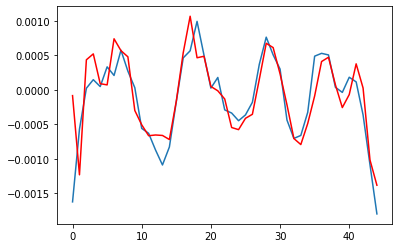

In [37]:
model_cpi = run_arima(Decom_cpi,ts="residuals", p=15,d=0,q=0   )

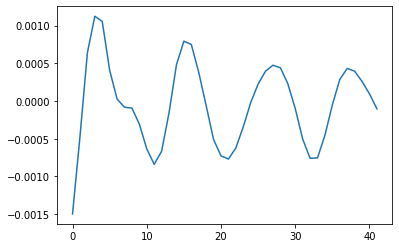

In [38]:
plt.figure()
plt.plot(model_cpi.forecast(42)[0])

In [39]:
model_cpi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              residuals   No. Observations:                   45
Model:                    ARMA(15, 0)   Log Likelihood                 305.632
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 11 Feb 2021   AIC                           -577.265
Time:                        14:35:39   BIC                           -546.551
Sample:                             0   HQIC                          -565.815
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.288e-05   4.71e-05     -1.758      0.079      -0.000    9.53e-06
ar.L1.residuals      1.0118      0.174      5.811      0.000       0.671       1.353
ar.L2.residuals     -0.1478      0.216     -0.685      0.493      -0.571       0.275
ar.L3.residuals     -0.5641      0.216     -2.614      0.009      -0.987      -0.141
ar.L4.residuals     -0.1662      0.232     -0.716      0.474      -0.621       0.289
ar.L5.residuals      0.3210      0.236      1.363      0.173      -0.141       0.783
ar.L6.residuals      0.2332      0.233      0.999      0.318      -0.224       0.691
ar.L7.residuals     -0.4603      0.232     -1.983      0.047      -0.915      -0.005
ar.L8.residuals     -0.4509      0.216     -2.084      0.037      -0.875      -0.027
ar.L9.residuals      0.4125      0.233      1.773      0.076      -0.043       0.868
ar.L10.residuals     0.2628      0.240      1.094      0.274      -0.208       0.734
ar.L11.residuals    -0.3745      0.247     -1.515      0.130      -0.859       0.110
ar.L12.residuals    -0.0878      0.248     -0.354      0.723      -0.574       0.398
ar.L13.residuals     0.0364      0.240      0.151      0.880      -0.435       0.507
ar.L14.residuals     0.3108      0.239      1.302      0.193      -0.157       0.778
ar.L15.residuals    -0.3648      0.172     -2.116      0.034      -0.703      -0.027
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0639           -0.0000j            1.0639           -0.5000
AR.2            -0.9601           -0.4653j            1.0669           -0.4282
AR.3            -0.9601           +0.4653j            1.0669            0.4282
AR.4            -0.7016           -0.9009j            1.1419           -0.3553
AR.5            -0.7016           +0.9009j            1.1419            0.3553
AR.6            -0.3526           -1.0095j            1.0694           -0.3035
AR.7            -0.3526           +1.0095j            1.0694            0.3035
AR.8             1.0583           -0.3041j            1.1012           -0.0445
AR.9             1.0583           +0.3041j            1.1012            0.0445
AR.10            0.8587           -0.5384j            1.0135           -0.0891
AR.11            0.8587           +0.5384j            1.0135            0.0891
AR.12            0.4486           -0.9551j            1.0552           -0.1801
AR.13            0.4486           +0.9551j            1.0552            0.1801
AR.14            0.6066           -0.8524j            1.0462           -0.1516
AR.15            0.6066           +0.8524j            1.0462            0.1516
------------------------------------------------------------------------------
"""